In [12]:
%pylab inline
import pandas as pd
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [611]:
data = pd.read_csv('cjDatag.csv')

In [612]:
data

,SpecObjID,z,zErr,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,299489676975171584,0.021275,0.000009,17.15042,15.49709,14.67401,14.23429,13.90754
1,299489677444933632,0.021222,0.000009,17.15042,15.49709,14.67401,14.23429,13.90754
2,299489951853078528,0.213925,0.000052,20.43201,18.64892,17.46552,16.99866,16.67051
3,299489952322840576,0.203783,0.000039,21.33477,19.1311,17.71072,17.14913,16.75609
4,299490501608892416,0.126554,0.000062,20.77302,18.64713,17.30827,16.71435,16.21529
5,299490502078654464,0.064656,0.000021,19.50913,17.59275,16.67357,16.20524,15.83744
6,299490776486799360,0.448645,0.000168,25.34187,21.41487,19.63125,18.82388,18.31009
7,299491051364706304,0.055988,0.000011,null,null,null,null,null
8,299491051834468352,0.052654,0.000009,19.48928,18.32375,17.8396,17.52613,17.42273
9,299491326712375296,0.213861,0.000040,20.43201,18.64892,17.46552,16.99866,16.67051


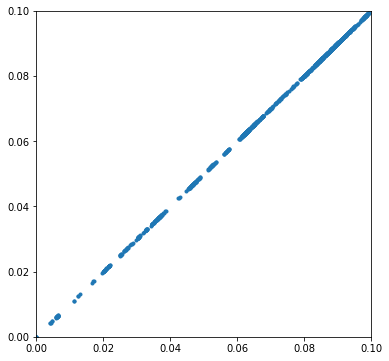

In [614]:
ylim(0,0.1)
xlim(0,0.1)
plot(data.z, data.z, '.')
show()

In [971]:
x1 = data.modelMag_u
x2 = data.modelMag_g
x3 = data.modelMag_r
x4 = data.modelMag_i
for i in range(2000):
    if x1[i] == 'null':
        x1[i] = 0
        x2[i] = 0
        x3[i] = 0
        x4[i] = 0

In [972]:
type(data.modelMag_u)

pandas.core.series.Series

In [973]:
xdata = tf.placeholder(dtype = tf.float32, shape = [4, 1])
ydata = tf.placeholder(dtype = tf.float32, shape = [1])

# Új

In [974]:
weights = {'h1' : tf.Variable(tf.truncated_normal(shape = [4, 256]), dtype = tf.float32),
          'h2' :tf.Variable(tf.truncated_normal(shape = [256, 128]), dtype = tf.float32),
          'out' : tf.Variable(tf.truncated_normal(shape = [128, 1]), dtype = tf.float32)}
biases = {'b1' :tf.Variable(tf.zeros(shape = [256]), dtype = tf.float32),
         'b2' :tf.Variable(tf.zeros(shape = [128]), dtype = tf.float32),
         'out' :tf.Variable(tf.zeros(shape = [1]), dtype = tf.float32)}

In [975]:
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(tf.transpose(xdata),(weights['h1'])), biases['b1']))
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
output = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])

In [976]:
delta = tf.constant(0.1)
loss = tf.multiply(tf.square(delta), tf.sqrt(1. +tf.square((ydata - output)/delta)) - 1.)#tf.sqrt(np.abs(tf.square(output)-tf.square((ydata))))
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train_step = my_optimizer.minimize(loss)

In [989]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)
epoch = 35000
w_v = []
for i in range(epoch):
    rand_index = np.random.choice(2000)
    x1rand = [x1[rand_index]]
    x2rand = [x2[rand_index]]
    x3rand = [x3[rand_index]]
    x4rand = [x4[rand_index]]
    
    yrand = [data.z[rand_index]]
    sess.run(train_step, feed_dict = {xdata: [x1rand,x2rand, x3rand, x4rand ], ydata : yrand})
    if i % 1000 == 0 :
        print((sess.run(loss,feed_dict = {xdata: [x1rand,x2rand, x3rand, x4rand ], ydata : yrand}) ),',')

[[ 14.87063789]] ,
[[ 0.17041345]] ,
[[ 0.00742337]] ,
[[  4.45485148e-06]] ,
[[  1.21593484e-06]] ,
[[  2.64644655e-07]] ,
[[ 0.00024056]] ,
[[  5.29408499e-06]] ,
[[ 0.02045424]] ,
[[  2.68220930e-07]] ,
[[  4.62293656e-06]] ,
[[ 0.00025981]] ,
[[ 0.00015214]] ,
[[ 0.27355403]] ,
[[  1.36363515e-05]] ,
[[ 0.00012048]] ,
[[  6.63995763e-07]] ,
[[  7.87687386e-05]] ,
[[  5.72204613e-08]] ,
[[ 0.00444724]] ,
[[  1.85215486e-05]] ,
[[ 0.00274109]] ,
[[  5.69760850e-05]] ,
[[ 0.00084539]] ,
[[ 0.27947375]] ,
[[ 0.00019964]] ,
[[ 0.243865]] ,
[[ 0.00986237]] ,
[[  2.59876259e-07]] ,
[[  2.15828441e-05]] ,
[[  2.63822094e-05]] ,
[[  1.13248831e-07]] ,
[[  1.85966499e-07]] ,
[[  2.14266784e-05]] ,
[[  6.66451524e-05]] ,


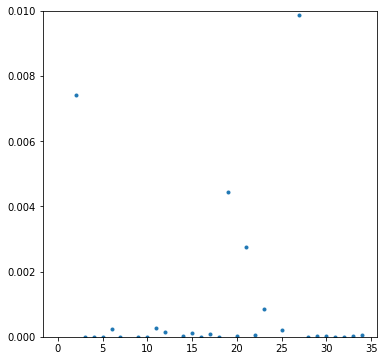

In [995]:
a = ([[ 14.87063789]] ,
[[ 0.17041345]] ,
[[ 0.00742337]] ,
[[  4.45485148e-06]] ,
[[  1.21593484e-06]] ,
[[  2.64644655e-07]] ,
[[ 0.00024056]] ,
[[  5.29408499e-06]] ,
[[ 0.02045424]] ,
[[  2.68220930e-07]] ,
[[  4.62293656e-06]] ,
[[ 0.00025981]] ,
[[ 0.00015214]] ,
[[ 0.27355403]] ,
[[  1.36363515e-05]] ,
[[ 0.00012048]] ,
[[  6.63995763e-07]] ,
[[  7.87687386e-05]] ,
[[  5.72204613e-08]] ,
[[ 0.00444724]] ,
[[  1.85215486e-05]] ,
[[ 0.00274109]] ,
[[  5.69760850e-05]] ,
[[ 0.00084539]] ,
[[ 0.27947375]] ,
[[ 0.00019964]] ,
[[ 0.243865]] ,
[[ 0.00986237]] ,
[[  2.59876259e-07]] ,
[[  2.15828441e-05]] ,
[[  2.63822094e-05]] ,
[[  1.13248831e-07]] ,
[[  1.85966499e-07]] ,
[[  2.14266784e-05]] ,
[[  6.66451524e-05]] )
shape(a)
a = reshape(a, (35))
ylim(0, 0.01)
plot(a, '.')

In [978]:
k = 900
result = sess.run(output, feed_dict = {xdata : reshape([x1[k], x2[k], x3[k], x4[k]], (4,1)), ydata : reshape(data.z[3], (1))})
print(result)
print(data.z[k])

[[ 0.11174415]]
0.1281922


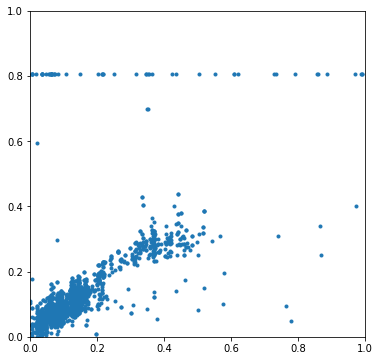

In [979]:
r = zeros(2000)
for i in range(2000):
    r[i] = sess.run(output, feed_dict = {xdata : reshape([x1[i], x2[i], x3[i], x4[i]], (4,1)), ydata : reshape(data.z[i], (1))})
figsize(6,6)
xlim(0,1)
ylim(0, 1)
plot(data.z[:2000], r, '.')
show()

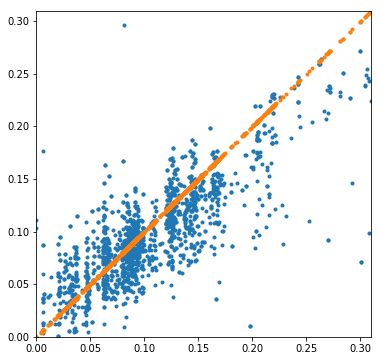

In [980]:
figsize(6,6)
xlim(0,0.31)
ylim(0, 0.31)
plot(data.z[:2000], r, '.', data.z, data.z, ".")
show()

# Régi, nem túl jól működő

In [804]:
w = tf.Variable(tf.truncated_normal(shape = [4, 4]), dtype = tf.float32)
b = tf.Variable(tf.zeros(shape = [4,1]), dtype = tf.float32)
w2 = tf.Variable(tf.truncated_normal(shape = [4, 1]), dtype = tf.float32)
b2 = tf.Variable(tf.zeros(shape = [1]), dtype = tf.float32)

In [805]:
first_layer = tf.nn.sigmoid(tf.add(tf.matmul(w,xdata),b))+1
second_layer = tf.add(tf.tensordot(tf.transpose(w2), first_layer, 1),b2)

In [806]:
first_layer

<tf.Tensor 'add_2:0' shape=(4, 1) dtype=float32>

In [807]:
second_layer

<tf.Tensor 'Add_95:0' shape=<unknown> dtype=float32>

In [808]:
loss = tf.sqrt(np.abs(tf.square(second_layer)-tf.square((ydata))))
my_optimizer = tf.train.AdamOptimizer(learning_rate = 0.00009)
train_step = my_optimizer.minimize(loss)

In [ ]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)
epoch = 80000
w_v = []
for i in range(epoch):
    rand_index = np.random.choice(2000)
    x1rand = [x1[rand_index]]
    x2rand = [x2[rand_index]]
    x3rand = [x3[rand_index]]
    x4rand = [x4[rand_index]]
    
    yrand = [data.z[rand_index]]
    sess.run(train_step, feed_dict = {xdata: [x1rand,x2rand, x3rand, x4rand ], ydata : yrand})
    

In [ ]:
#print(sess.run(w), sess.run(b))
result = sess.run(second_layer, feed_dict = {xdata : reshape([x1[3], x2[3], x3[3], x4[3]], (4,1)), ydata : reshape(data.z[3], (1))})

In [ ]:
data.z[3]

In [ ]:
print(str(result))

In [ ]:
r = zeros(2000)
for i in range(2000):
    r[i] = sess.run(second_layer, feed_dict = {xdata : reshape([x1[i], x2[i], x3[i], x4[i]], (4,1)), ydata : reshape(data.z[i], (1))})


In [ ]:
figsize(6,6)
xlim(0,0.35)
ylim(0, 0.35)
plot(data.z[:2000], r, '.')

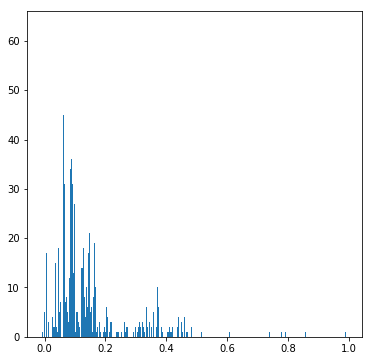

In [690]:
a = hist(data.z, 1000)